# Chapter 2 
- Intensity values
- Masks
- Filters

In [4]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Data type: uint8
Min. value: 3
Max value: 224


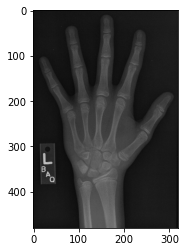

In [5]:
# Load the hand radiograph
im = imageio.imread('images/hand.png',)
print('Data type:', im.dtype)
print('Min. value:', np.min(im))
print('Max value:', np.max(im))

# Plot the grayscale image
plt.imshow(im,vmin=0,vmax=255,cmap='gray')

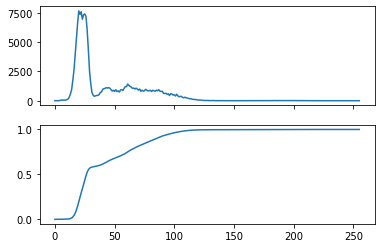

In [6]:
# Import SciPy's "ndimage" module
import scipy.ndimage as ndi 

# Create a histogram, binned at each possible value
hist = ndi.histogram(im,min=0,max=255,bins=256)

# Create a cumulative distribution function
cdf = hist.cumsum() / hist.sum()

# Plot the histogram and CDF
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(hist, label='Histogram')
axes[1].plot(cdf, label='CDF')

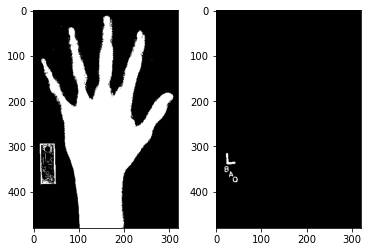

In [7]:
# Create skin and bone masks
mask_bone = im >= 145
mask_skin = (im >= 45) & (im < 145)
# Plot the skin (0) and bone (1) masks
fig, axes = plt.subplots(1,2)
axes[0].imshow(mask_skin,cmap='gray')
axes[1].imshow(mask_bone,cmap='gray')

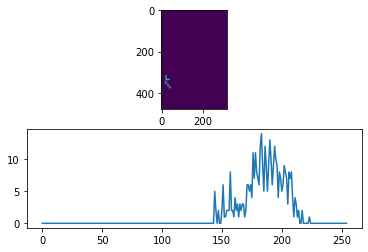

In [8]:
# Import SciPy's "ndimage" module
import scipy.ndimage as ndi

# Screen out non-bone pixels from "im"
mask_bone = im >= 145
im_bone = np.where(mask_bone, im, 0)

# Get the histogram of bone intensities
hist = ndi.histogram(im_bone,min=1,max=255,bins=255)

# Plot masked image and histogram
fig, axes = plt.subplots(2,1)
axes[0].imshow(im_bone,cmap='gray')
axes[1].plot(hist)

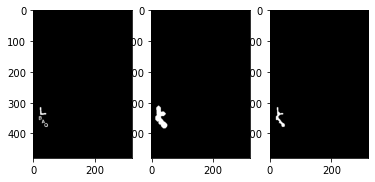

In [12]:
# Create and tune bone mask
mask_bone = im >= 145
mask_dilate = ndi.binary_dilation(mask_bone, iterations = 5)
mask_closed = ndi.binary_closing(mask_bone,iterations = 5)

# Plot masked images
fig, axes = plt.subplots(1,3)
axes[0].imshow(mask_bone,cmap='gray')
axes[1].imshow(mask_dilate,cmap='gray')
axes[2].imshow(mask_closed,cmap='gray')


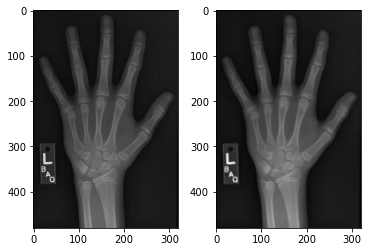

In [13]:
# Set filter weights
weights = [[0.11, 0.11, 0.11],
           [0.11, 0.11, 0.11], 
           [0.11, 0.11, 0.11]]

# Convolve the image with the filter
im_filt = ndi.convolve(im, weights)

# Plot the images
fig, axes = plt.subplots(1,2)
axes[0].imshow(im,cmap='gray')
axes[1].imshow(im_filt,cmap='gray')


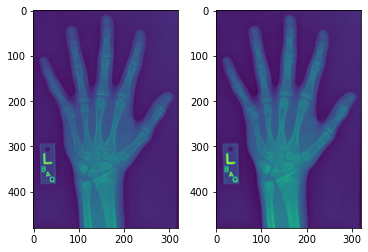

In [14]:
# Set filter weights
weights = [[0.11, 0.11, 0.11],
           [0.11, 0.11, 0.11], 
           [0.11, 0.11, 0.11]]

# Convolve the image with the filter
im_filt = ndi.convolve(im, weights)

# Plot the images
fig, axes = plt.subplots(1,2)
axes[0].imshow(im)
axes[1].imshow(im_filt)

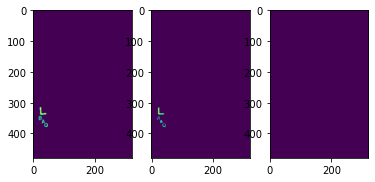

In [15]:
# Smooth "im" with Gaussian filters
im_s1 = ndi.gaussian_filter(im, sigma=1)
im_s3 =  ndi.gaussian_filter(im, sigma=3)

# Draw bone masks of each image
fig, axes = plt.subplots(1,3)
axes[0].imshow(im >= 145)
axes[1].imshow(im_s1 >= 145)
axes[2].imshow(im_s3 >= 145)


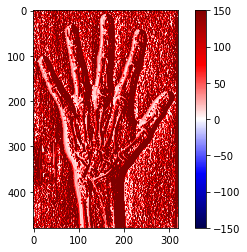

In [16]:
# Set weights to detect vertical edges
weights = [[1,0,-1], [1,0,-1], [1,0,-1]]

# Convolve "im" with filter weights
edges = ndi.convolve(im,weights)

# Draw the image in color
plt.imshow(edges, cmap='seismic', vmin=-150, vmax=150)
plt.colorbar()


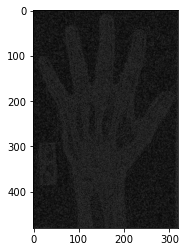

In [20]:
# Apply Sobel filter along both axes
sobel_ax0 = ndi.sobel(im, axis=0)
sobel_ax1 = ndi.sobel(im, axis=1)

# Calculate edge magnitude 
edges = np.sqrt(np.square(sobel_ax0)+np.square(sobel_ax1))

# Plot edge magnitude
plt.imshow(edges.astype('float'), vmax=75,cmap='gray')
